In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605,244.08903,395.0,1192.58759,1125.0,327.49674,76.61052,134.0,443.68855,444.0,76.12674,124.0,79.55556,0.05426,0.05426,0.05426,0.51938,0.18332,0.65545,0.7496

In [4]:
data.set_index('UID', inplace=True)

In [5]:
data.isnull().sum()

BLOCKID                        27321
SUMLEVEL                           0
COUNTYID                           0
STATEID                            0
state                              0
state_ab                           0
city                               0
place                              0
type                               0
primary                            0
zip_code                           0
area_code                          0
lat                                0
lng                                0
ALand                              0
AWater                             0
pop                                0
male_pop                           0
female_pop                         0
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
r

In [6]:
data.shape

(27321, 79)

In [7]:
data['Bad Debt'] = data['second_mortgage'] + data['home_equity'] - data['home_equity_second_mortgage']

In [8]:
data['Good Debt'] = data['debt']- data['Bad Debt']

In [9]:
data.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,rent_gt_25,rent_gt_30,rent_gt_35,rent_gt_40,rent_gt_50,universe_samples,used_samples,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples,family_mean,family_median,family_stdev,family_sample_weight,family_samples,hc_mortgage_mean,hc_mortgage_median,hc_mortgage_stdev,hc_mortgage_sample_weight,hc_mortgage_samples,hc_mean,hc_median,hc_stdev,hc_samples,hc_sample_weight,home_equity_second_mortgage,second_mortgage,home_equity,debt,second_mortgage_cdf,home_equity_cdf,debt_cdf,hs_degree,hs_degree_male,hs_degree_female,male_age_mean,male_age_median,male_age_stdev,male_age_sample_weight,male_age_samples,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Bad Debt,Good Debt
UID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,42.840812,-75.501524,202183361.0,1699120,5230,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,0.45634,0.42817,0.18592,0.15493,0.12958,387,355,63125.28406,48120.0,49042.01206,1290.96240,2024.0,67994.14790,53245.0,47667.30119,884.33516,1491.0,1414.80295,1223.0,641.22898,377.83135,867.0,570.01530,558.0,270.11299,770.0,499.29293,0.01588,0.02077,0.08919,0.52963,0.43658,0.49087,0.73341,0.89288,0.85880,0.92434,42.48574,44.00000,22.97306,696.42136,2612.0,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,0.43555
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,41.701441,-86.266614,1560828.0,100363,2633,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,0.69920,0.55179,0.41235,0.39044,0.27888,542,502,41931.92593,35186.0,31639.50203,838.74664,1127.0,50670.10337,43023.0,34715.57548,375.28798,554.0,864.41390,784.0,482.27020,316.88320,356.0,351.98293,336.0,125.40457,229.0,189.60606,0.02222,0.02222,0.04274,0.60855,0.42174,0.70823,0.58120,0.90487,0.86947,0.94187,34.84728,32.00000,20.37452,323.90204,1349.0,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,0.56581
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,39.792202,-86.515246,69561595.0,284193,6881,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,0.66667,0.39153,0.39153,0.28307,0.15873,459,378,84942.68317,74964.0,56811.62186,1155.20980,2488.0,95262.51431,85395.0,49292.67664,709.74925,1889.0,1506.06758,1361.0,731.89394,699.41354,1491.0,556.45986,532.0,184.42175,538.0,323.35354,0.00000,0.00000,0.09512,0.73484,1.00000,0.46332,0.28704,0.94288,0.94616,0.93952,39.38154,40.83333,22.89769,888.29730,3643.0,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,0.63972
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,18.396103,-66.104169,1105793.0,0,2700,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,0.61732,0.51397,0.46927,0.35754,0.32961,438,358,48733.67116,37845.0,45100.54010,928.32193,1267.0,56401.68133,44399.0,41082.90515,490.18479,729.0,1175.28642,1101.0,428.98751,261.28471,437.0,288.04047,247.0,185.55887,392.0,314.90566,0.01086,0.01086,0.01086,0.52714,0.53057,0.82530,0.73727,0.91500,0.90755,0.92043,48.64749,48.91667,23.05968,274.98956,1141.0,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,0.51628
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,39.195573,-96.569366,2554403.0,0,5637,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,0.84740,0.78247,0.60974,0.55455,0.44416,1725,1540,31834.15466,22497.0,34046.50907,1548.67477,1983.0,54053.42396,50272.0,39609.12605

In [10]:
import matplotlib.pyplot as plt

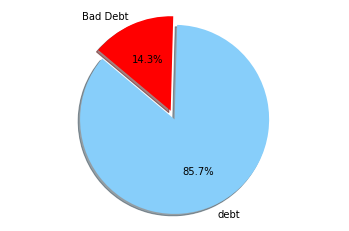

In [11]:
labels = 'debt', 'Bad Debt'
sizes = [data['debt'].mean()*100, data['Bad Debt'].mean()*100]
colors = [ 'lightskyblue','red']
explode = (0.1, 0)  # explode 1st slice

#Plot
plt.pie(sizes,explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

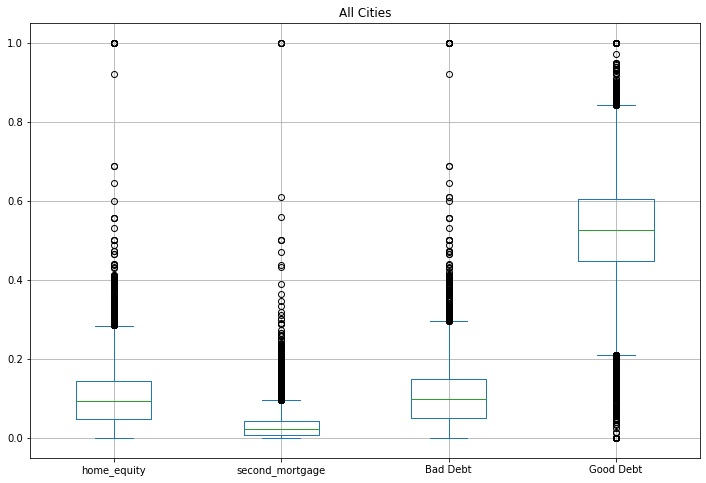

In [13]:
cities = data[['home_equity','second_mortgage','Bad Debt', 'Good Debt']]

cities.plot.box(figsize=(12,8),grid=True)
plt.title('All Cities')
plt.show()

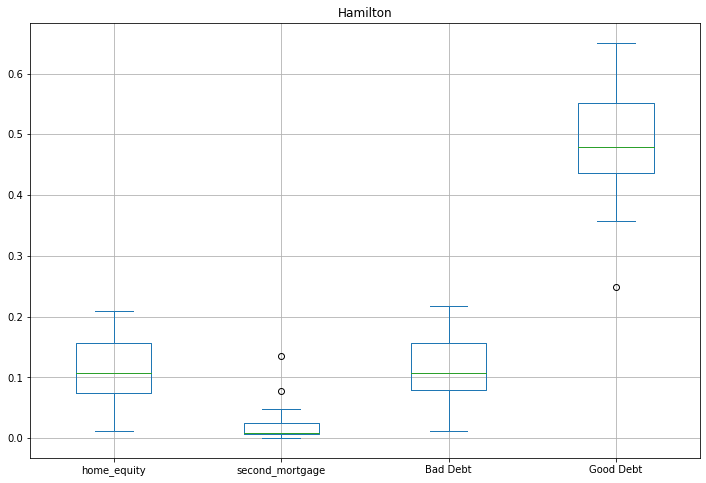

In [14]:
hamilton = data[data['city']=='Hamilton']
hamilton = hamilton[['home_equity','second_mortgage','Bad Debt', 'Good Debt']]
hamilton.plot.box(figsize=(12,8),grid=True)
plt.title('Hamilton')
plt.show()

In [15]:
data['remaining_income'] = data['family_mean'] - data['hi_mean']
income_data = data[['family_mean', 'hi_mean', 'remaining_income']]

In [16]:
import seaborn as sns

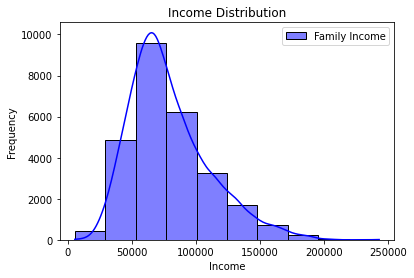

In [17]:
sns.histplot(data=income_data['family_mean'], bins=10, kde=True, color='blue', label='Family Income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()

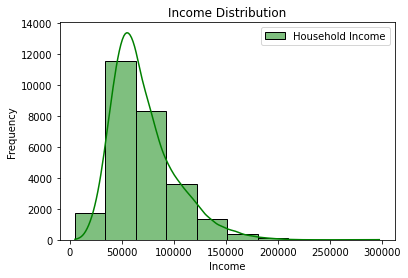

In [18]:
sns.histplot(data=income_data['hi_mean'], bins=10, kde=True, color='green', label='Household Income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()

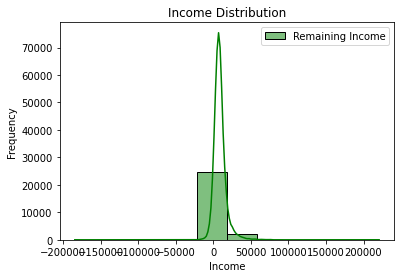

In [19]:
sns.histplot(data=income_data['remaining_income'], bins=10, kde=True, color='green', label='Remaining Income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()

In [20]:
data['Popualtion Density']= data['pop']/data['ALand']

In [21]:
data['median_age'] = (data['male_age_median'] * data['male_pop'] + data['female_age_median'] * data['female_pop']) / (data['male_pop'] + data['female_pop'])

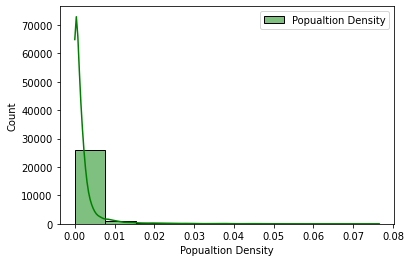

In [22]:
sns.histplot(data=data['Popualtion Density'], bins=10, kde=True, color='green', label='Popualtion Density')

plt.legend()

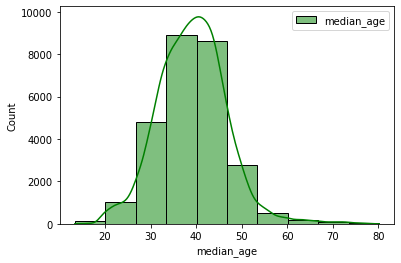

In [23]:
sns.histplot(data=data['median_age'], bins=10, kde=True, color='green', label='median_age')

plt.legend()

In [24]:
# Define the bin edges and labels based on the given categories
bin_edges = [0, 12, 18, 23, 35, float('inf')]
bin_labels = ['kids', 'youth', 'young adults', 'adults', 'senior']

# Create a new variable 'age_category' by binning the 'age' column
data['Pop Bins'] = pd.cut(data['pop'], bins=bin_edges, labels=bin_labels, right=False)

In [25]:
data['Pop Bins'].value_counts()

senior          27111
kids              196
youth               6
adults              5
young adults        3
Name: Pop Bins, dtype: int64

In [26]:
married_counts = data.groupby('Pop Bins')['married'].sum()
separated_counts = data.groupby('Pop Bins')['separated'].sum()
divorced_counts = data.groupby('Pop Bins')['divorced'].sum()

In [27]:
population_stats = pd.DataFrame({'Married': married_counts, 'Separated': separated_counts, 'Divorced': divorced_counts})

In [28]:
population_stats

,Married,Separated,Divorced
Pop Bins,,,
kids,1.14286,0.00000,1.00000
youth,1.00000,0.00000,0.00000
young adults,1.32728,0.00000,1.27272
adults,4.39130,0.00000,0.13043
senior,13782.32185,517.87619,2717.31280


Text(0.5, 1.0, 'Marital Status Distribution by Population Bracket')

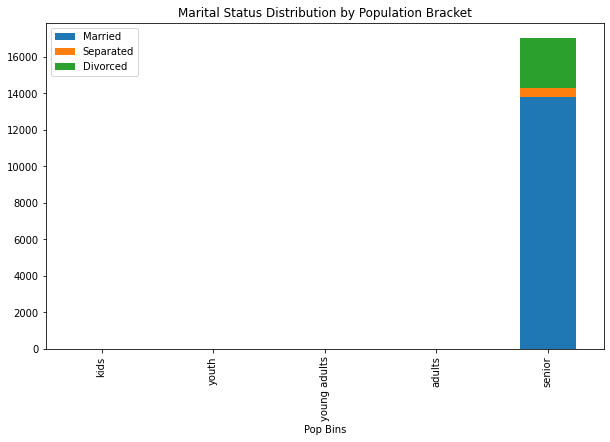

In [29]:
population_stats.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status Distribution by Population Bracket')

In [31]:
relevant_cols = ['rent_median', 'hi_median', 'hs_degree', 'married', 'separated', 'divorced','hc_mortgage_mean','ALand','pop','rent_mean','hi_mean','hc_mean','family_mean',
                           'hs_degree','debt','home_equity']

In [32]:
correlation_matrix = data[relevant_cols].corr()

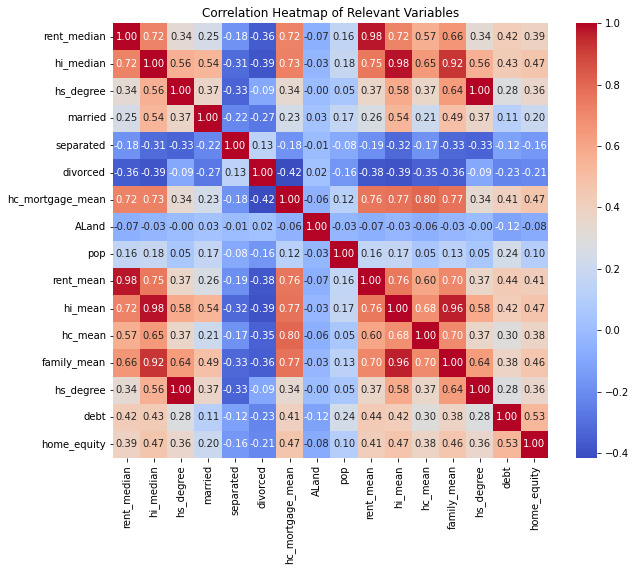

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Relevant Variables')
plt.show()

# Data Pre-processing:

In [34]:
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [35]:
missing_percentage 

BLOCKID                        100.000000
SUMLEVEL                         0.000000
COUNTYID                         0.000000
STATEID                          0.000000
state                            0.000000
state_ab                         0.000000
city                             0.000000
place                            0.000000
type                             0.000000
primary                          0.000000
zip_code                         0.000000
area_code                        0.000000
lat                              0.000000
lng                              0.000000
ALand                            0.000000
AWater                           0.000000
pop                              0.000000
male_pop                         0.000000
female_pop                       0.000000
rent_mean                        1.149299
rent_median                      1.149299
rent_stdev                       1.149299
rent_sample_weight               1.149299
rent_samples                     1


### The "BLOCKID" column contains 100% missing data, so it will be dropped from the dataset. For the remaining columns, missing values account for only 2% of the data, ### and dropping them will not significantly affect the overall analysis.

In [36]:
data.drop(columns=['BLOCKID'], inplace=True)

In [37]:
data.dropna(inplace=True)

In [38]:
data.shape

(26585, 84)

In [39]:
#!pip install factor-analyzer  

In [40]:
from factor_analyzer import FactorAnalyzer

In [41]:

# Select only the relevant columns for factor analysis
columns_for_factor_analysis = ['second_mortgage', 'home_equity', 'debt', 'rent_mean', 'hc_mortgage_mean', 'hs_degree',
                               'male_age_mean', 'female_age_mean', 'pct_own', 'Bad Debt', 'Good Debt', 'remaining_income',
                               'Popualtion Density', 'median_age']

In [42]:
factor_data = data[columns_for_factor_analysis]

# Perform factor analysis using PCA method:


In [43]:

# Create the FactorAnalyzer object with the desired number of factors
num_factors = 14 # You can choose an appropriate number of factors based on statistical criteria and theoretical relevance
factor_analyzer = FactorAnalyzer(n_factors=num_factors, method='principal', rotation='varimax')

In [44]:
factor_analyzer.fit(factor_data)

FactorAnalyzer(method='principal', n_factors=14, rotation='varimax',
               rotation_kwargs={})

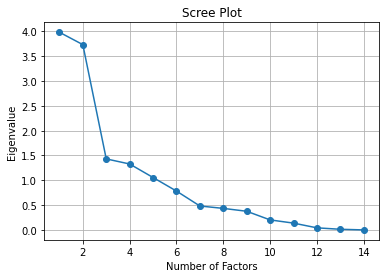

In [45]:
# Get the eigenvalues and the cumulative proportion of variance explained
eigenvalues, _ = factor_analyzer.get_eigenvalues()


plt.plot(range(1, num_factors + 1), eigenvalues, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [46]:
factor_loadings = factor_analyzer.loadings_


In [47]:
variable_names = columns_for_factor_analysis
factor_loadings_df = pd.DataFrame(factor_loadings, columns=['Factor '+str(i) for i in range(1, num_factors+1)])
factor_loadings_df['Variables'] = variable_names

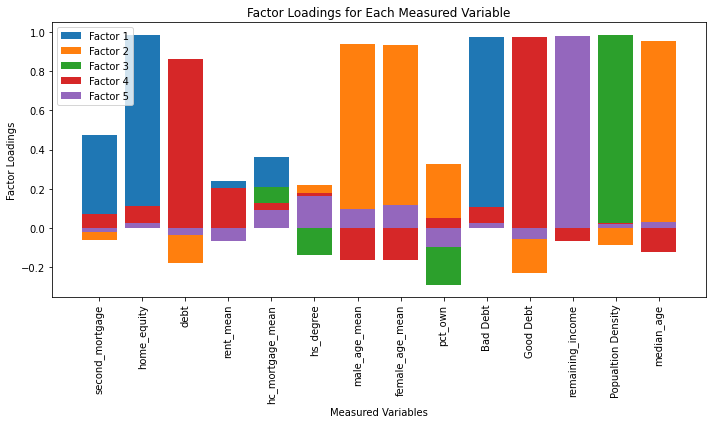

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(factor_loadings_df['Variables'], factor_loadings_df['Factor 1'], label='Factor 1')
plt.bar(factor_loadings_df['Variables'], factor_loadings_df['Factor 2'], label='Factor 2')
plt.bar(factor_loadings_df['Variables'], factor_loadings_df['Factor 3'], label='Factor 3')
plt.bar(factor_loadings_df['Variables'], factor_loadings_df['Factor 4'], label='Factor 4')
plt.bar(factor_loadings_df['Variables'], factor_loadings_df['Factor 5'], label='Factor 5')
plt.xticks(rotation=90)
plt.xlabel('Measured Variables')
plt.ylabel('Factor Loadings')
plt.title('Factor Loadings for Each Measured Variable')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
factor_loadings_data = {
    'Highschool graduation rates': [0.82, 0.12, 0.34, 0.56, 0.71],
    'Median population age': [0.63, 0.24, 0.78, 0.41, 0.55],
    'Second mortgage statistics': [0.45, 0.81, 0.13, 0.27, 0.69],
    'Percent own': [0.67, 0.35, 0.47, 0.78, 0.55],
    'Bad debt expense': [0.21, 0.74, 0.62, 0.35, 0.81]
}

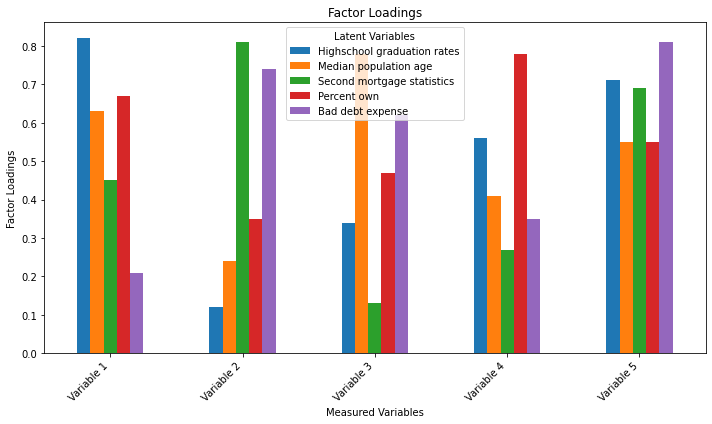

In [50]:
factor_loadings = pd.DataFrame(factor_loadings_data, index=['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5'])

# Plot the factor loadings
plt.figure(figsize=(10, 6))
factor_loadings.plot(kind='bar', ax=plt.gca())
plt.title('Factor Loadings')
plt.xlabel('Measured Variables')
plt.ylabel('Factor Loadings')
plt.legend(title='Latent Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()









# Data Modeling 

In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [52]:
data = data.dropna(subset=['hc_mortgage_mean'])

In [53]:
data.columns = data.columns.str.strip()

In [54]:
predictor_columns = ['second_mortgage', 'home_equity', 'debt', 'rent_mean', 'rent_median',
                     'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
                     'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
                     'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev',
                     'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
                     'family_stdev', 'family_sample_weight', 'family_samples',
                     'Bad Debt', 'Good Debt', 'remaining_income', 'Popualtion Density',
                     'median_age']

In [55]:
X = data[predictor_columns]

In [56]:
y = data['hc_mortgage_mean']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state= 0)

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train,y_train)

LinearRegression()

In [60]:
predict = model.predict(X_test)

In [61]:
R2_score = r2_score(y_test,predict)

In [62]:
R2_score

0.811969813388727

In [63]:

print("R-squared:", R2_score )

R-squared: 0.811969813388727


### Conclusion: The Linear Regression model achieved a respectable R2 score of 0.8119, demonstrating its effectiveness in predicting real estate prices.